In [1]:
import numpy as np
import pandas as pd
import json
import os
import tensorflow as tf

In [2]:
df_train = pd.read_csv (r'C:\Users\DhanrajChowdhury\OneDrive - SPIKEWELL\IntentClassifier\Custom Intent\atis_snips\atis\train.csv')
df_test = pd.read_csv (r'C:\Users\DhanrajChowdhury\OneDrive - SPIKEWELL\IntentClassifier\Custom Intent\atis_snips\atis\test.csv')

df_train = df_train[df_train["intent"].str.contains("#")==False]
df_test = df_test[df_test["intent"].str.contains("#")==False]

#df = df_train.append(df_test, ignore_index=True)
df = pd.concat([df_train, df_test], ignore_index=True, sort=False)

text = df['text']
labels = df['intent']

classes = np.unique(labels)

In [3]:
#convert_to_dataframe

data = pd.DataFrame({'text': text, 'intent': labels})
print(data)

                                                   text        intent
0     i want to fly from baltimore to dallas round trip   atis_flight
1     round trip fares from baltimore to philadelphi...  atis_airfare
2     show me the flights arriving on baltimore on j...   atis_flight
3     what are the flights which depart from san fra...   atis_flight
4     which airlines fly from boston to washington d...  atis_airline
...                                                 ...           ...
5825  please find all the flights from cincinnati to...   atis_flight
5826  find me a flight from cincinnati to any airpor...   atis_flight
5827  i'd like to fly from miami to chicago on ameri...   atis_flight
5828  i would like to book a round trip flight from ...   atis_flight
5829  find me a flight that flies from memphis to ta...   atis_flight

[5830 rows x 2 columns]


In [4]:
with pd.option_context('display.max_rows', None):
    print(data.groupby("intent").count())
    
data.groupby("intent").count().shape

                     text
intent                   
atis_abbreviation     180
atis_aircraft          90
atis_airfare          472
atis_airline          195
atis_airport           38
atis_capacity          37
atis_city              25
atis_day_name           2
atis_distance          30
atis_flight          4298
atis_flight_no         20
atis_flight_time       55
atis_ground_fare       25
atis_ground_service   291
atis_meal              12
atis_quantity          54
atis_restriction        6


(17, 1)

In [5]:
classes

array(['atis_abbreviation', 'atis_aircraft', 'atis_airfare',
       'atis_airline', 'atis_airport', 'atis_capacity', 'atis_city',
       'atis_day_name', 'atis_distance', 'atis_flight', 'atis_flight_no',
       'atis_flight_time', 'atis_ground_fare', 'atis_ground_service',
       'atis_meal', 'atis_quantity', 'atis_restriction'], dtype=object)

In [6]:
#convert_to_lower_case

data["lower"] = data.text.map(lambda x : x.lower())

In [7]:
# import nltk
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")
# nltk.download('omw-1.4')

In [8]:
#word_tokenize

from nltk import word_tokenize

data["tokenized"] = data.lower.map(word_tokenize)

In [9]:
#stopwords_remove

from nltk.corpus import stopwords
from string import punctuation

def remove_stop(strings, stop_list):
    classed = [s for s in strings if s not in stop_list]
    return classed

stop = stopwords.words("english")
stop_punc = list(set(punctuation)) + stop

data["selected"] = data.tokenized.map(lambda df: remove_stop(df, stop_punc))

In [10]:
#normalize

from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

def normalize(text):
    return " ".join(text)

stemmer = LancasterStemmer()

data["lemmatized"] = data.selected.map(lambda xs: [lemmatizer.lemmatize(x) for x in xs])
data["normalized"] = data.lemmatized.apply(normalize)

data

,text,intent,lower,tokenized,selected,lemmatized,normalized
0,i want to fly from baltimore to dallas round trip,atis_flight,i want to fly from baltimore to dallas round trip,"[i, want, to, fly, from, baltimore, to, dallas...","[want, fly, baltimore, dallas, round, trip]","[want, fly, baltimore, dallas, round, trip]",want fly baltimore dallas round trip
1,round trip fares from baltimore to philadelphi...,atis_airfare,round trip fares from baltimore to philadelphi...,"[round, trip, fares, from, baltimore, to, phil...","[round, trip, fares, baltimore, philadelphia, ...","[round, trip, fare, baltimore, philadelphia, l...",round trip fare baltimore philadelphia le 1000...
2,show me the flights arriving on baltimore on j...,atis_flight,show me the flights arriving on baltimore on j...,"[show, me, the, flights, arriving, on, baltimo...","[show, flights, arriving, baltimore, june, fou...","[show, flight, arriving, baltimore, june, four...",show flight arriving baltimore june fourteenth
3,what are the flights which depart from san fra...,atis_flight,what are the flights which depart from san fra...,"[what, are, the, flights, which, depart, from,...","[flights, depart, san, francisco, fly, washing...","[flight, depart, san, francisco, fly, washingt...",flight depart san francisco fly washington via...
4,which airlines fly from boston to washington d...,atis_airline,which airlines fly from boston to washington d...,"[which, airlines, fly, from, boston, to, washi...","[airlines, fly, boston, washington, dc, via, c...","[airline, fly, boston, washington, dc, via, city]",airline fly boston washington dc via city
...,...,...,...,...,...,...,...
5825,please find all the flights from cincinnati to...,atis_flight,please find all the flights from cincinnati to...,"[please, find, all, the, flights, from, cincin...","[please, find, flights, cincinnati, airport, n...","[please, find, flight, cincinnati, airport, ne...",please find flight cincinnati airport new york...
5826,find me a flight from cincinnati to any airpor...,atis_flight,find me a flight from cincinnati to any airpor...,"[find, me, a, flight, from, cincinnati, to, an...","[find, flight, cincinnati, airport, new, york,...","[find, flight, cincinnati, airport, new, york,...",find flight cincinnati airport new york city area
5827,i'd like to fly from miami to chicago on ameri...,atis_flight,i'd like to fly from miami to chicago on ameri...,"[i, 'd, like, to, fly, from, miami, to, chicag...","['d, like, fly, miami, chicago, american, airl...","['d, like, fly, miami, chicago, american, airl...",'d like fly miami chicago american airline
5828,i would like to book a round trip flight from ...,atis_flight,i would like to book a round trip flight from ...,"[i, would, like, to, book, a, round, trip, fli...","[would, like, book, round, trip, flight, kansa...","[would, like, book, round, trip, flight, kansa...",would like book round trip flight kansa city c...


In [11]:
#train_test_split

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size = 0.15, random_state = 5)

In [12]:
#tf_tokenize

from tensorflow.keras.preprocessing.text import Tokenizer

max_num_words = 10000

tokenizer = Tokenizer(num_words = max_num_words)
tokenizer.fit_on_texts(train_data.normalized)

word_index = tokenizer.word_index

tokenized_train = tokenizer.texts_to_sequences(train_data.normalized)
tokenized_test = tokenizer.texts_to_sequences(test_data.normalized)

In [13]:
len(word_index)

729

In [14]:
#max_len_of_sentences

maxLen = 0
for t in tokenized_train+tokenized_test:
    if len(t) > maxLen:
        maxLen = len(t)

maxLen

30

In [15]:
#padding

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(tokenized_train, maxlen = maxLen, padding = "post")
test_padded = pad_sequences(tokenized_test, maxlen = maxLen, padding = "post")

In [16]:
print(train_padded.shape, test_padded.shape)

(4955, 30) (875, 30)


In [17]:
#one_hot_encoded_x

def transform_x(data, tokenizer):
    output_shape = [data.shape[0],
                  data.shape[1],
                  tokenizer.word_index.keys().__len__()]
    results = np.zeros(output_shape)
    
    for i in range(data.shape[0]):
        for ii in range(data.shape[1]):
            results[i, ii, data[i,ii]-1]= 1
    return results

xtr_transformed = transform_x(train_padded, tokenizer)
xts_transformed = transform_x(test_padded, tokenizer)

In [18]:
xtr_transformed.shape

(4955, 30, 729)

In [19]:
#one_hot_encoded_y

from sklearn.preprocessing import OneHotEncoder as OHE

y_encoder = OHE().fit(np.array(train_data.intent).reshape(-1,1))

ytr_encoded = y_encoder.transform(np.array(train_data.intent).reshape(-1,1)).toarray()
yts_encoded = y_encoder.transform(np.array(test_data.intent).reshape(-1,1)).toarray()

In [20]:
ytr_encoded.shape

(4955, 17)

In [21]:
embeddings_index={}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [22]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
num_words = min(max_num_words, len(word_index))+1
embedding_dim=len(embeddings_index['the'])
embedding_matrix = np.random.normal(emb_mean, emb_std, (num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_num_words:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [23]:
# #CNN

# import tensorflow as tf
# from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Dropout
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D

# embedding_layer = Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], trainable=True)

# sequence_input = Input(shape=(train_padded.shape[1],), dtype='int32')
# embedded_sequences = embedding_layer(sequence_input)
# x = Conv1D(64, 3, activation='relu')(embedded_sequences)
# x = Conv1D(64, 3, activation='relu')(x)
# x = MaxPooling1D(2)(x)
# x = Flatten()(x)
# x = Dense(100, activation='relu')(x)
# preds = Dense(ytr_encoded.shape[1], activation='softmax')(x)
# model = Model(sequence_input, preds)

# model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [24]:
# #Regular LSTM

# from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
# from tensorflow.keras.models import Sequential

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1],
#           trainable=False, weights=[embedding_matrix]))

# model.add(LSTM(256, return_sequences=True))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu"))
# model.add(Dense(128, activation = "relu"))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))

# model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [25]:
# #Bidirectional LSTM

# import tensorflow as tf
# from tensorflow.python.keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1],
#           trainable=False, weights=[embedding_matrix]))

# model.add(Bidirectional(LSTM(256, return_sequences=True)))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu"))
# model.add(Dense(128, activation = "relu"))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


# model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

In [26]:
# #Bidirectional LSTM with Regularization

# import tensorflow as tf
# from tensorflow.python.keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], 
#           trainable=False, weights=[embedding_matrix]))
    
# model.add(Bidirectional(LSTM(256, return_sequences=True)))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu", kernel_regularizer ='l1'))
# model.add(Dense(128, activation = "relu", kernel_regularizer ='l1'))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


# model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])

In [27]:
# #Bidirectional LSTM with Regularization and Dropout

# import tensorflow as tf
# from tensorflow.python.keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding

# model = Sequential()

# model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], 
#                     trainable=False, weights=[embedding_matrix]))
    
# model.add(Bidirectional(LSTM(256, return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dense(256, activation = "relu", kernel_regularizer ='l2'))
# model.add(Dense(128, activation = "relu", kernel_regularizer ='l2'))
# model.add(Dropout(0.3))
# model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


# model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])

In [28]:
#Bidirectional LSTM and Dropout(with Decaying LR)

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Input, Dropout, LSTM, CuDNNLSTM, Activation, Bidirectional, Embedding

model = Sequential()

model.add(Embedding(num_words, embedding_matrix.shape[1], input_length=train_padded.shape[1], 
                    trainable=False, weights=[embedding_matrix]))
    
model.add(Bidirectional(CuDNNLSTM(256, return_sequences=True)))
model.add(Dropout(0.25))
model.add(CuDNNLSTM(128, return_sequences=False))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(ytr_encoded.shape[1], activation = "softmax"))


model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])

In [29]:
import math
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler

# tensorboard
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

# checkpoint
filepath="models/weights-improvement-{epoch:02d}-{accuracy:.2f}.ckpt"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1,
                             save_weights_only=True, save_best_only=True, mode='max')

# lr_scheduler
def step_decay(epoch):
    initial_lrate = 0.0005
    drop = 0.5
    epochs_drop = 5.0
    
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    print("lr:", lrate)
    
    return lrate
    
#     if lrate >= 0.0000125:
#         return lrate
#     else:
#         return 0.0000125

lrate = LearningRateScheduler(step_decay)

callbacks_list = [lrate, tb_callback]

In [30]:
import tensorflow as tf

with tf.device('/cpu:0'):
    history = model.fit(train_padded, ytr_encoded, epochs = 50,
                        batch_size = 64, shuffle=True,
                        validation_split = 0.1, callbacks = callbacks_list)
#with tf.device('/device:GPU:0'):
#     history = model.fit(train_padded, ytr_encoded, epochs = 50,
#                         batch_size = 64, shuffle=True,
#                         validation_split = 0.1, callbacks = callbacks_list)

Epoch 1/50
lr: 0.0005
70/70 [==============================] - 16s 172ms/step - loss: 1.2831 - accuracy: 0.7302 - val_loss: 1.0868 - val_accuracy: 0.7480
Epoch 2/50
lr: 0.0005
70/70 [==============================] - 10s 149ms/step - loss: 1.1796 - accuracy: 0.7396 - val_loss: 1.0679 - val_accuracy: 0.7480
Epoch 3/50
lr: 0.0005
70/70 [==============================] - 10s 148ms/step - loss: 1.0743 - accuracy: 0.7419 - val_loss: 0.8667 - val_accuracy: 0.7903
Epoch 4/50
lr: 0.0005
70/70 [==============================] - 11s 156ms/step - loss: 0.8411 - accuracy: 0.7683 - val_loss: 0.6581 - val_accuracy: 0.8448
Epoch 5/50
lr: 0.0005
70/70 [==============================] - 11s 155ms/step - loss: 0.7132 - accuracy: 0.7975 - val_loss: 0.5335 - val_accuracy: 0.8770
Epoch 6/50
lr: 0.00025
70/70 [==============================] - 11s 151ms/step - loss: 0.5862 - accuracy: 0.8439 - val_loss: 0.4370 - val_accuracy: 0.8790
Epoch 7/50
lr: 0.00025
70/70 [==============================] - 10s 149ms/s

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 30, 100)           73000     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 30, 512)           733184    
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 30, 512)           0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 128)               328704    
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 256)               33024     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 128)               32896     
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 128)               0

In [32]:
# import tensorflow as tf

# with tf.device('/cpu:0'):
#     history = model.fit(train_padded, ytr_encoded, epochs = 5,
#           batch_size = 64, shuffle=True,
#           validation_split = 0.15)
# #with tf.device('/device:GPU:0'):

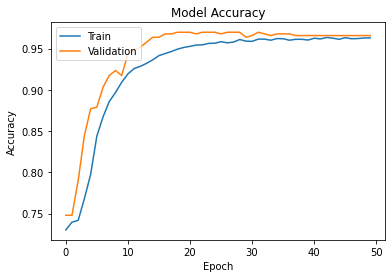

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

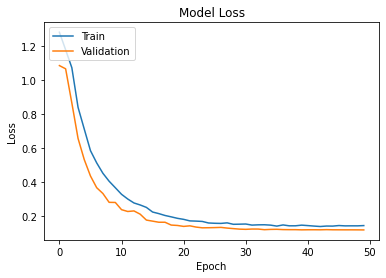

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
#performance_evaluation_train

from sklearn.metrics import classification_report

with tf.device('/cpu:0'):
    prediction = y_encoder.inverse_transform(model.predict(train_padded))
print(classification_report(train_data.intent, prediction))

                     precision    recall  f1-score   support

  atis_abbreviation       0.94      0.99      0.97       148
      atis_aircraft       0.92      0.86      0.89        83
       atis_airfare       0.96      0.99      0.98       378
       atis_airline       0.94      0.99      0.96       163
       atis_airport       0.58      1.00      0.74        32
      atis_capacity       0.70      0.97      0.81        34
          atis_city       0.56      0.48      0.51        21
      atis_day_name       0.00      0.00      0.00         2
      atis_distance       0.00      0.00      0.00        21
        atis_flight       0.99      0.99      0.99      3669
     atis_flight_no       0.00      0.00      0.00        19
   atis_flight_time       0.40      0.69      0.51        49
   atis_ground_fare       0.90      0.90      0.90        20
atis_ground_service       0.99      0.98      0.99       254
          atis_meal       0.00      0.00      0.00        10
      atis_quantity    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
#performance_evaluation_test

from sklearn.metrics import classification_report

with tf.device('/cpu:0'):
    prediction_test = y_encoder.inverse_transform(model.predict(test_padded))
print(classification_report(test_data.intent, prediction_test))

                     precision    recall  f1-score   support

  atis_abbreviation       0.86      0.94      0.90        32
      atis_aircraft       1.00      0.86      0.92         7
       atis_airfare       0.96      0.93      0.94        94
       atis_airline       0.79      0.97      0.87        32
       atis_airport       0.44      0.67      0.53         6
      atis_capacity       0.33      0.67      0.44         3
          atis_city       0.67      0.50      0.57         4
      atis_distance       0.00      0.00      0.00         9
        atis_flight       0.98      0.98      0.98       629
     atis_flight_no       0.00      0.00      0.00         1
   atis_flight_time       0.40      0.67      0.50         6
   atis_ground_fare       0.75      0.60      0.67         5
atis_ground_service       0.92      0.95      0.93        37
          atis_meal       0.00      0.00      0.00         2
      atis_quantity       1.00      0.50      0.67         8

           accuracy   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# cm = confusion_matrix(train_data.intent, prediction)

# fig, ax = plt.subplots(figsize=(25,25))
# sns.set(font_scale=0.5)
# sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

In [ ]:
# incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

# incorr_fraction

In [ ]:
# incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

# fig, ax = plt.subplots(figsize=(25,25))

# plt.bar(np.arange(10), incorr_fraction)
# plt.xlabel('True Label')
# plt.ylabel('Fraction of incorrect predictions')

In [ ]:
import keras
import pickle
import json

from keras.models import save_model

model.save('models/my_model_atis')

with open('utils/classes_atis.pkl','wb') as file:
   pickle.dump(classes,file)

with open('utils/tokenizer_atis.pkl','wb') as file:
   pickle.dump(tokenizer,file)

with open('utils/label_encoder_atis.pkl','wb') as file:
   pickle.dump(y_encoder,file)

In [ ]:
# import keras
# import pickle

# model = keras.models.load_model('models/my_model_atis')

# with open('utils/classes_atis.pkl','rb') as file:
#   classes = pickle.load(file)

# with open('utils/tokenizer_atis.pkl','rb') as file:
#   tokenizer = pickle.load(file)

# with open('utils/label_encoder_atis.pkl','rb') as file:
#   y_encoder = pickle.load(file)